<a href="https://colab.research.google.com/github/JahanaShirineKC/Regression/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [161]:
!pip install pandas scikit-learn


Dataset Loading


In [162]:
import pandas as pd

# Path to your CSV file
csv_file_path = '/content/Salary.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display basic statistics of the dataframe
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
       YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000
YearsExperience    0
Salary             0
dtype: int64


Preprocessing


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Salary' is the target variable and all other columns are features
X = df.drop('Salary', axis=1)
y = df['Salary']

# If there are any categorical features, encode them using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Random Forest Regression

In [164]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load and prepare the data
df = pd.read_csv('/content/Salary.csv')
X = df[['YearsExperience']]  # Feature
y = df['Salary']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with specified parameters
model_random = RandomForestRegressor(
    n_estimators=100,         # Number of trees in the forest
    max_features='sqrt',      # Number of features to consider for the best split
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    random_state=42           # Seed for reproducibility
)

# Train the model
model_random.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_random.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error (MAE): 3411.089285714285
Mean Squared Error (MSE): 24216045.24671783
R^2 Score: 0.9528477213946429


In [165]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_random = mean_absolute_error(y_test, y_pred)
mse_random = mean_squared_error(y_test, y_pred)
r2_random = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae_random}')
print(f'Mean Squared Error (MSE): {mse_random}')
print(f'R^2 Score: {r2_random}')

Mean Absolute Error (MAE): 3411.089285714285
Mean Squared Error (MSE): 24216045.24671783
R^2 Score: 0.9528477213946429


Linear Regression


In [166]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)


In [167]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae_linear}')
print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'R^2 Score: {r2_linear}')

Mean Absolute Error (MAE): 6692.364094497284
Mean Squared Error (MSE): 55761791.306260146
R^2 Score: 0.8914234140042779


Gradient Boosting Regression


In [168]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the GradientBoostingRegressor with specified hyperparameters
model_gradient = GradientBoostingRegressor(
    learning_rate=0.1,          # Learning rate for updating the weights
    max_depth=3,                # Maximum depth of the individual regression estimators
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
    min_samples_split=10,       # Minimum number of samples required to split an internal node
    n_estimators=100            # Number of boosting stages to be run
)

# Train the model with the training data
model_gradient.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_gradient.predict(X_test)

# Calculate evaluation metrics
mae_gradient = mean_absolute_error(y_test, y_pred)
mse_gradient = mean_squared_error(y_test, y_pred)
r2_gradient = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_gradient}')
print(f'Mean Squared Error (MSE): {mse_gradient}')
print(f'R^2 Score: {r2_gradient}')


Mean Absolute Error (MAE): 3771.8198427410543
Mean Squared Error (MSE): 29657608.992000062
R^2 Score: 0.9422521791765702


Comparison


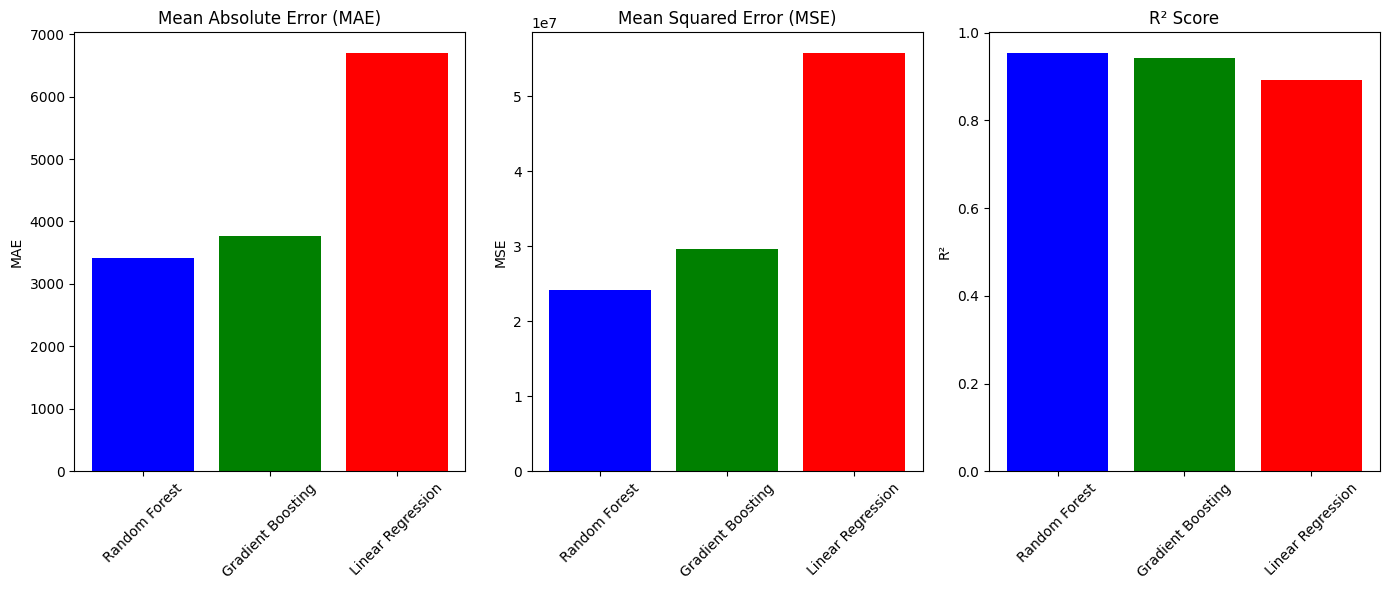

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each metric and model
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
mae_values = [mae_random, mae_gradient, mae_linear]
mse_values = [mse_random, mse_gradient, mse_linear]
r2_values = [r2_random, r2_gradient, r2_linear]

# Plotting the MAE
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# Plotting the MSE
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plotting the R² Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R² Score')
plt.ylabel('R²')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


conclusion: "Random Forest Regression has best Result"


Prediction


In [170]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


# Collect user input
YoE = float(input("Enter year of Experience: "))
user_data = {'YearsExperience': [YoE]}
input_df = pd.DataFrame(user_data)

# Make predictions
prediction1 = model_random.predict(input_df)
prediction2 = model_linear.predict(input_df)
prediction3 = model_gradient.predict(input_df)

# Print predictions
print(f'The predicted value using Random Forest is: ${prediction1[0]:,.2f}')
print(f'The predicted value using Linear Regression is: ${prediction2[0]:,.2f}')
print(f'The predicted value using Gradient Boosting is: ${prediction3[0]:,.2f}')


Enter year of Experience: 1.1
The predicted value using Random Forest is: $40,985.79
The predicted value using Linear Regression is: $38,515.27
The predicted value using Gradient Boosting is: $42,383.35
